![logo cinepolis](https://upload.wikimedia.org/wikipedia/commons/thumb/5/53/Cin%C3%A9polis_logo.svg/3000px-Cin%C3%A9polis_logo.svg.png)


# Actividad 5.3.4

- Jorge Emiliano Pomar
- A01709338
- Fecha: 07 de junio de 2025


In [2]:
import altair as alt
import pandas as pd

In [3]:
df = pd.read_csv("2016-1.csv")

La paleta de colores utilizada es de los colores de Cinépolis. En este caso, decidí utilizar el logo antiguo porque tiene más colores y en mi opinión está más bonito. Los colores son azul, amarillo, verde oliva, y tonos de azul claro. Creo que en este caso la paleta si tiene algo a favor y es que al tener colores como azul y amarillo, esos dos contrastan, y en las gráficas puedes usar eso a favor para demostrar diferentes categorías. Y los tonos de azul claro y verde oliva son más neutros, por lo que puedes usarlos para mostrar datos que no son tan importantes o que no quieres destacar tanto. Tal vez faltan más colores, pero creo que con estos se ve muy limpio y además no se ve tan saturado.

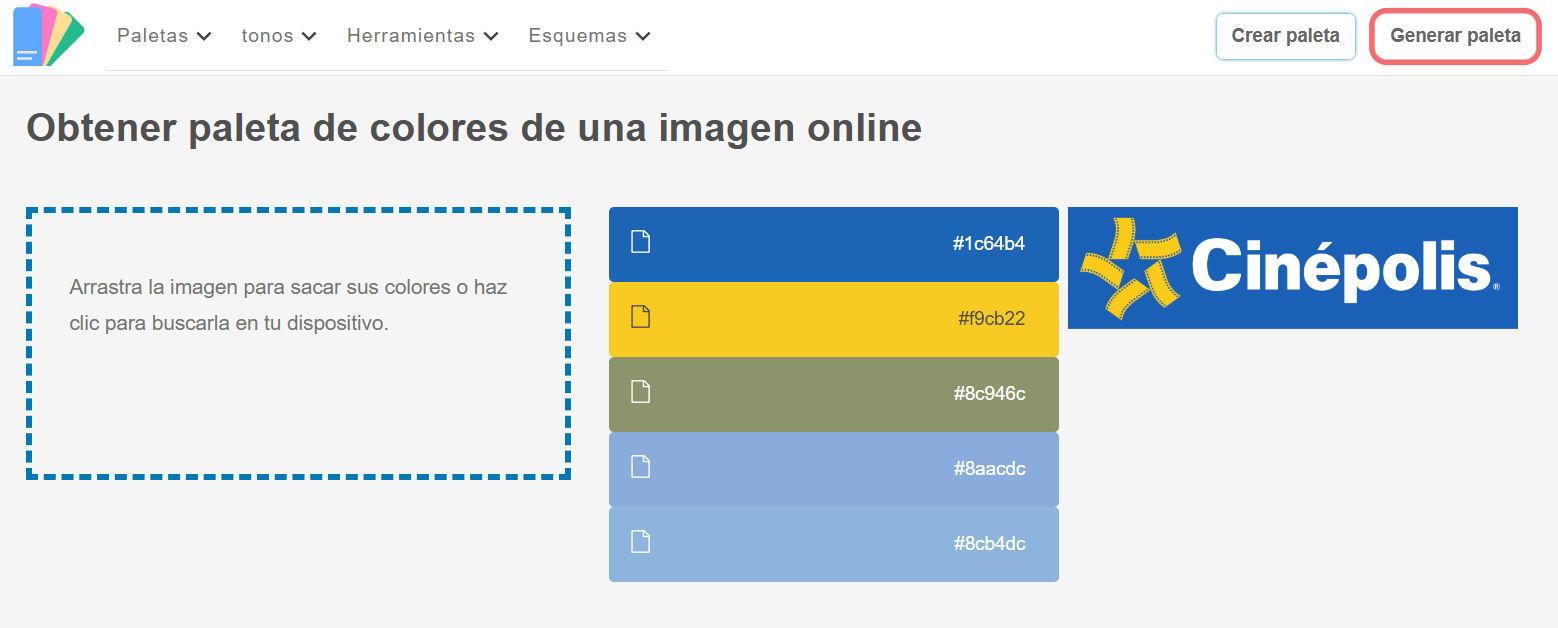

In [4]:
# Paleta de colores de cinepolis
colors = ["#1c64b4", "#f9cb22", "#8c946c", "#8aacdc", "#8cb4dc"]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157 entries, 0 to 156
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        157 non-null    object 
 1   Region                         157 non-null    object 
 2   Happiness Rank                 157 non-null    int64  
 3   Happiness Score                157 non-null    float64
 4   Lower Confidence Interval      157 non-null    float64
 5   Upper Confidence Interval      157 non-null    float64
 6   Economy (GDP per Capita)       157 non-null    float64
 7   Family                         157 non-null    float64
 8   Health (Life Expectancy)       157 non-null    float64
 9   Freedom                        157 non-null    float64
 10  Trust (Government Corruption)  157 non-null    float64
 11  Generosity                     157 non-null    float64
 12  Dystopia Residual              157 non-null    flo

In [6]:
df.sample(10)

,Country,Region,Happiness Rank,Happiness Score,Lower Confidence Interval,Upper Confidence Interval,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
54,Moldova,Central and Eastern Europe,55,5.897,5.823,5.971,0.69177,0.83132,0.52309,0.25202,0.01903,0.19997,3.38007
9,Sweden,Western Europe,10,7.291,7.227,7.355,1.45181,1.08764,0.83121,0.58218,0.40867,0.38254,2.54734
3,Norway,Western Europe,4,7.498,7.421,7.575,1.57744,1.12690,0.79579,0.59609,0.35776,0.37895,2.66465
41,Bahrain,Middle East and Northern Africa,42,6.218,6.128,6.308,1.44024,0.94397,0.65696,0.47375,0.25772,0.17147,2.27405
133,Gabon,Sub-Saharan Africa,134,4.121,4.030,4.212,1.15851,0.72368,0.34940,0.28098,0.09314,0.06244,1.45332
142,South Sudan,Sub-Saharan Africa,143,3.832,3.596,4.068,0.39394,0.18519,0.15781,0.19662,0.13015,0.25899,2.50929
110,Sierra Leone,Sub-Saharan Africa,111,4.635,4.505,4.765,0.36485,0.62800,0.00000,0.30685,0.08196,0.23897,3.01402
152,Benin,Sub-Saharan Africa,153,3.484,3.404,3.564,0.39499,0.10419,0.21028,0.39747,0.06681,0.20180,2.10812
62,Slovenia,Central and Eastern Europe,63,5.768,5.683,5.853,1.29947,1.05613,0.79151,0.53164,0.03635,0.25738,1.79522
126,Congo (Brazzaville),Sub-Saharan Africa,127,4.236,4.107,4.365,0.77109,0.47799,0.28212,0.37938,0.09753,0.12077,2.10681


## 1. Heatmap de componentes del bienestar por región


In [7]:
componentes = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
               'Freedom', 'Trust (Government Corruption)', 'Generosity']

region_avg = df.groupby("Region")[componentes].mean().reset_index()
region_avg_melt = region_avg.melt(id_vars="Region", var_name="Componente", value_name="Valor")

graph1 = alt.Chart(region_avg_melt).mark_rect().encode(
    x=alt.X("Componente:N", title="Componente"),
    y=alt.Y("Region:N", title="Región"),
    color=alt.Color("Valor:Q", scale=alt.Scale(scheme='blues')),
    tooltip=["Region", "Componente", "Valor"]
).properties(title="Promedio de Componentes del Bienestar por Región")

graph1.display(width=800, height=400)

c:\Users\pomar\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\pomar\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

- Este heatmap muestra que el componente que más peso tiene en la sensación de bienestar es la economía GDP en la mayoría de las regiones. Igualmente, para muchas regiones, la familia parece ser más importante que los demás componentes, incluso la Salud. Y además, lo que menos tiene peso en cualquiera de los países es la confianza en el gobierno por su corrupción. Probablemente esto lo vemos claro en México y otros países tercermundistas donde hay mucha corrupción que es parte de la cultura y la gente no confía en el gobierno. Pero eso no significa que la gente no sea feliz, sino que la gente se adapta a las circunstancias y busca su bienestar en otros aspectos como la familia, la economía y la salud. Aquí utilicé la escala de azules de la paleta de cinépolis porque creo que se puede jugar más fácilmente con los tonos de azul para mostrar diferentes niveles de valores.

## 2. Bubble chart de la Libertad contra la corrupción y la confianza con el gobierno


In [8]:
graph2 = alt.Chart(df).mark_circle().encode(
    x=alt.X("Freedom:Q", title="Libertad"),
    y=alt.Y("Trust (Government Corruption):Q", title="Confianza en el Gobierno"),
    size=alt.Size("Happiness Score", title="Puntaje de Felicidad"),
    color=alt.Color("Region:N", scale=alt.Scale(range=colors)),
    tooltip=["Country", "Region", "Happiness Score", "Freedom", "Trust (Government Corruption)"]
).properties(title="Confianza vs Libertad con Tamaño según Felicidad")
graph2.display(width=800, height=400)

c:\Users\pomar\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\pomar\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

- Esta gráfica de burbujas muestra que hay una relación positiva entre la libertad y la confianza en el gobierno, así como un tamaño de burbuja que indica el puntaje de felicidad de cada país. Los países con mayor libertad tienden a tener una mayor confianza en el gobierno y, en general, un mayor puntaje de felicidad. Aquí debo admitir que me faltaron más colores, porque en esta gráfica si se presta a que cada region tenga un color diferente de burbuja. Aún así creo que se ve bien con los colores de la paleta de cinépolis, ya que el azul es un color que transmite confianza y seguridad, lo cual es importante en este tipo de gráficas. Además, el amarillo resalta las burbujas más grandes, lo que ayuda a identificar los países con mayor puntaje de felicidad.


## 3. Gráfica de dispersión entre Happiness Rank y Happiness Score


In [9]:
graph3 = (
    alt.Chart(df)
    .mark_circle(color=colors[1], size=60)
    .encode(x=f"Happiness Rank:Q", y=f"Happiness Score:Q")
    .properties(title=f"Dispersión entre Happiness Rank y Happiness Score")
)
graph3.display(width=1200, height=400)

c:\Users\pomar\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\pomar\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

- Este mapa de dispersión es muy obvio. La relación entre el ranking y el score se ve gradualmente. Pero fue interesante ver si había alguna caída abrupta entre algun país a otro, pero la verdad es que no. Se ve muy consistente la relación entre el ranking y el score. Los países con un puntaje más alto tienden a tener un ranking más bajo, lo que indica que son considerados más felices. Por otro lado, los países con un puntaje más bajo tienden a tener un ranking más alto, lo que indica que son considerados menos felices. Esta gráfica se presta a que solo tenga un color, en este cado utilicé el amarillo de la paleta de cinépolis, ya que es un color que resalta y ayuda a identificar los puntos en la gráfica. Además, el amarillo es un color que transmite felicidad y optimismo, lo cual es apropiado para esta gráfica que trata sobre la felicidad de los países.

## 4. Gráfica de línea de happiness score por país


In [10]:
graph4 = (
    alt.Chart(df)
    .mark_line(color=colors[4], point=True)
    .encode(
        x="Country:O", y="Happiness Score:Q", tooltip=["Country", "Happiness Score"]
    )
    .properties(title="Happiness Score vs. Happiness Rank")
)
graph4.display(width=1200, height=400)

c:\Users\pomar\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\pomar\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

- Este gráfico de líneas muestra que de manera visual que tan alto es el índice de felicidad en cada país. Poco se puede conlcuír de esto más que la tendencia general de que los países más desarrollados tienden a tener un mayor índice de felicidad. Utilicé el azul claro para las líneas y los puntos de azul obscuro. En este caso creo que no se necesita más que un color suave a la vista para que no distraiga de la tendencia general de la gráfica. 


## 5. Gráfica de la corrupción de cada país


In [18]:
# Definir los umbrales para alto, medio y bajo
bins = [df["Trust (Government Corruption)"].min(), 0.2, 0.4, df["Trust (Government Corruption)"].max()]
labels = ["Bajo", "Medio", "Alto"]

df["Corrupción Nivel"] = pd.cut(df["Trust (Government Corruption)"], bins=bins, labels=labels, include_lowest=True)

color_map = {"Bajo": colors[2], "Medio": colors[0], "Alto": colors[1]}

graph5 = (
    alt.Chart(df)
    .mark_bar()
    .encode(
        x=alt.X("Country:N", sort="-y", title="País"),
        y=alt.Y("Trust (Government Corruption):Q", title="Corrupción de Gobierno"),
        color=alt.Color("Corrupción Nivel:N", scale=alt.Scale(domain=list(color_map.keys()), range=list(color_map.values())), title="Nivel de Corrupción"),
        tooltip=["Country", "Region", "Trust (Government Corruption)", "Corrupción Nivel"],
    )
    .properties(title="Corrupción de Gobierno por País (Alto, Medio, Bajo)")
)
graph5.display(width=1200, height=400)

c:\Users\pomar\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\pomar\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

- Este gráfico de barras igual tiene a todos los países y muestra el índice de corrupción de cada uno. El tooltip igual indica la región a la que pertenece el país. En este caso, el índice de corrupción no tiene una tendencia clara hacia países desarrollados o subdesarrollados. Están ambas categorías muy dispersas. Lo que sí es que es interesante ver países muy autoritarios como China y Rusia con un índice de corrupción muy bajo. Aquí decidí definir umbrales de alto medio y bajo nivel de corrupción. Y gracias a eso, elegí el verde oliva para los países con bajo nivel de corrupción, el azul para los países con medio nivel de corrupción y el amarillo para los países con alto nivel de corrupción. Esto ayuda a identificar rápidamente los niveles de corrupción en cada país y a comparar entre ellos. Además, el verde oliva es un color que transmite estabilidad y confianza, lo cual es apropiado para este tipo de gráficas que tratan sobre la corrupción en los gobiernos.

## 6. Gráfico de dispersión entre la felicidad y la economía GDP per cápita


In [12]:
graph6 = (
    alt.Chart(df)
    .mark_circle(size=60)
    .encode(
        x="Economy (GDP per Capita)",
        y="Happiness Score",
        color=alt.Color("Region", scale=alt.Scale(range=colors)),
        tooltip=["Country", "Region", "Happiness Score", "Economy (GDP per Capita)"],
    )
    .properties(title="Relación entre Economía y Felicidad")
)
graph6.display(width=1200, height=400)

c:\Users\pomar\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\pomar\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

- Lo que se puede observar en el gráfico de dispersión es que simplemente los países con mayor puntaje de felicidad también son los países más prósperos en cuanto a la economía. Más adelante podremos ver cómo se relacionan estos dos factores de manera más detallada. Elegí todos los colores de la paleta de cinépolis para los puntos, ya que creo que se ve bien y ayuda a identificar los puntos en la gráfica.

## 7. Gráfico de pilas de componentes que dan felicidad a los 5 países más felices

In [13]:
componentes = ['Economy (GDP per Capita)', 'Family', 'Health (Life Expectancy)', 
               'Freedom', 'Trust (Government Corruption)', 'Generosity']

top5 = df.nlargest(5, "Happiness Score").melt(id_vars=["Country"], value_vars=componentes)

graph7 = (
    alt.Chart(top5)
    .mark_bar()
    .encode(
        x=alt.X("value:Q", stack="zero", title="Suma de Componentes"),
        y=alt.Y("Country:N", title="País"),
        color=alt.Color("variable:N", scale=alt.Scale(range=colors)),
        tooltip=["Country", "variable", "value"]
    )
    .properties(title="Componentes del Bienestar en los 5 Países más Felices")
)

graph7.display(width=1200, height=400)

c:\Users\pomar\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\pomar\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.Chart(...)

- Aquí se concentran los 5 países más felices, y podemos ver que la economía es el componente más importante en todos los casos. Sin embargo, la familia y la salud también juegan un papel importante en la felicidad de estos países. Es interesante ver que, a pesar de que la economía es el componente más importante, no es el único factor que contribuye a la felicidad de las personas en estos países. La familia y la salud también son componentes importantes que deben ser considerados al analizar el bienestar de las personas. Utilicé los diferentes colores de la paleta de cinépolis para cada componente, lo que ayuda a identificar rápidamente los diferentes componentes que contribuyen a la felicidad en cada país. Además, el uso de colores contrastantes ayuda a resaltar las diferencias entre los componentes y a hacer que la gráfica sea más fácil de entender. 

## 8. Economía vs Felicidad por País (según Región seleccionada)

In [14]:
# Agregamos un selection point de regiones
selection = alt.selection_point(fields=['Region'], bind='legend', name='Región')

# Primera grafica de regiones y cantidad de países
graph_selector = alt.Chart(df).mark_bar().encode(
    y=alt.Y('Region:N', sort='-x'),
    x=alt.X('count():Q', title='Cantidad de Países'),
    color=alt.Color('Region:N', scale=alt.Scale(range=colors)),
    opacity=alt.condition(selection, alt.value(1), alt.value(0.2))
).add_params(selection).properties(title="Selecciona una Región")

# Gráfica secundaria, se marca la region seleccionada y se muestra la info
graph_detail = alt.Chart(df).mark_circle(size=100).encode(
    x=alt.X('Economy (GDP per Capita):Q', title='Economía (PIB per cápita)'),
    y=alt.Y('Happiness Score:Q', title='Puntaje de Felicidad'),
    color=alt.Color('Region:N', scale=alt.Scale(range=colors)),
    tooltip=['Country', 'Region', 'Happiness Score', 'Economy (GDP per Capita)'],
    opacity=alt.condition(selection, alt.value(1), alt.value(0))
).transform_filter(selection).properties(title="Economía vs Felicidad por País (según Región seleccionada)")

# Para visualizar en el mismo cuadro
(graph_selector & graph_detail).resolve_scale(color='independent')

c:\Users\pomar\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)
c:\Users\pomar\anaconda3\Lib\site-packages\altair\utils\core.py:395: FutureWarning: the convert_dtype parameter is deprecated and will be removed in a future version.  Do ``ser.astype(object).apply()`` instead if you want ``convert_dtype=False``.
  col = df[col_name].apply(to_list_if_array, convert_dtype=False)


alt.VConcatChart(...)

- Complementando la gráfica de barras de felicidad por país, aquí hay una distribución de los puntajes de felicidad por región. Se puede ver que la región de América del Norte tiene el puntaje más alto, seguida por Europa Occidental y América Latina. Por otro lado, África subsahara y Asia del Sur tienen los puntajes más bajos. Aquí si se puede ver claramente que las regiones más desarrolladas tienden a tener un mayor puntaje de felicidad, mientras que las regiones menos desarrolladas tienden a tener un menor puntaje de felicidad. Si faltaron colores porque en ocasiones se repiten para las regiones y los países, pero creo que si se logran identificar en ambas gráficas. A parte cuando das click en una región, se resalta la región seleccionada en ambas gráficas, lo que ayuda a identificar rápidamente los puntajes de felicidad por región.

## Conclusiones

- ¿Cuál es la importancia de una buena elección de color para la representación de datos?
    - La elección de colores puede mejorar la legibilidad y comprensión de los datos, además de hacer las gráficas más atractivas visualmente. 
    - Los colores contrastantes ayudan a distinguir categorías y facilitan la interpretación.
    - En este caso, se me hace buena paleta de colores la de cinépolis, pero para gráficas más extensas como las de barras, se quedan cortos los colores, y intentando prolongarlos, solo pude poner escala de azules que no se distinguen tanto. 

- ¿Altair es una buena librería para realizar gráficas? Comenta ventajas y desventajas
    - Yo la verdad prefiero plotly, creo que es más fácil la modificación de los estilos y tamaños que en altair. Ahorita tuve problemas para modificar los tamaños porque son muy cerrados los gráficos. Probablemente tenga que ver que son gráficas interpretadas que se pasan a Java Script.
    - Ventajas: 
      - Tienen muchos gráficos y algunos no están en plotly. 
      - Es más fácil la declaración de los comandos y creo que en general se hacen gráficos igual de complejos con menos comandos. 
    - Desventajas:
      - Es muy cerrado y no hay tanto control de costumización.
      - Hay cosas que no entiendo porque vienen de Vega Lite y pues es una curva de aprendizaje adicional. Plotly es más nativo de python a mi gusto. 